In [1]:
# 观察albumentations工具提供的图像增强效果
import matplotlib.pyplot as plt
import torch
import albumentations as A
import numpy as np
import cv2
from datasets import nii_loader
from utils import drawhistogram

In [2]:
data = nii_loader('LGE')['image']
label = nii_loader('LGE',is_label=True)['image']
image = data[:len(label)]

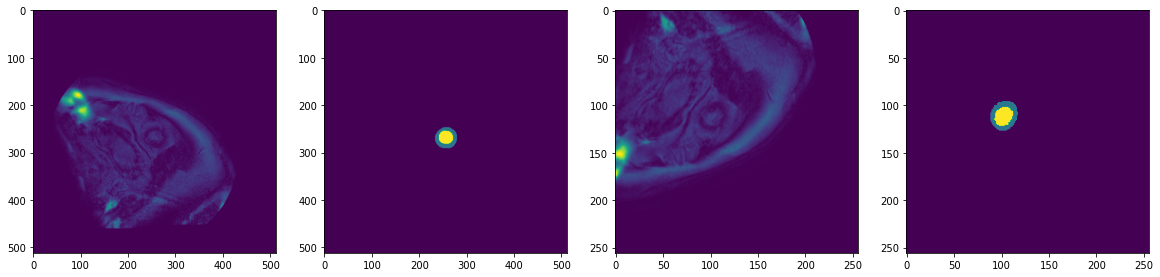

In [33]:
train_transforms = A.Compose([
            A.ElasticTransform(alpha=200,sigma=40,alpha_affine=50,p=0.8),
            A.Resize(height=int(256*1.2),width=int(256*1.2)),
            A.RandomCrop(height=256,width=256),
            A.RandomRotate90(),
            A.VerticalFlip(),
            A.Transpose(),
        ])
index = 1
re = train_transforms(image=image[index],mask=label[index])
ipro = re['image']
mpro = re['mask']
plt.figure(figsize=(20,20))
plt.subplot(1,4,1)
plt.imshow(image[index])
plt.subplot(1,4,2)
plt.imshow(label[index])
plt.subplot(1,4,3)
plt.imshow(ipro)
plt.subplot(1,4,4)
plt.imshow(mpro)

In [36]:
labels = mpro.flatten().tolist()
labels = set(labels)
print(labels)

{0.0, 500.0, 200.0}
